## Hospital Inpatient Discharges 2017 New York State
- Instances of hospitalization
- 34 columns, 2.9 million rows

Dataset sourced from New York State Health Department

https://health.data.ny.gov/dataset/Hospital-Inpatient-Discharges-SPARCS-De-Identified/22g3-z7e7

## Import original Dataset and save to smaller dataset keeping only pertinent data

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Read in data

df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2017.csv')
df.head()

In [0]:
# Only keep relevent columns

age_gender_race_DRG_MDC = df[['Age Group', 'Gender', 'Race', 'APR DRG Code', 'APR DRG Description', 'APR MDC Code', 'APR MDC Description']]
age_gender_race_DRG_MDC.head()

In [0]:
# Save smaller dataset

from google.colab import drive
drive.mount('drive')

In [0]:
# Save to Google Drive

age_gender_race_DRG_MDC.to_csv('age_gender_race_DRG_MDC.csv')
!cp age_gender_race_DRG_MDC.csv "drive/My Drive/"

## Smaller subset of original dataframe keeping: Age, Race, Gender, APR DRG and APR MDC

In [0]:
# Open new CSV
from google.colab import files
uploaded = files.upload()

Saving age_gender_race_DRG_MDC.csv to age_gender_race_DRG_MDC.csv


In [0]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Read in CSV
age_gender_race_DRG_MDC = pd.read_csv('age_gender_race_DRG_MDC.csv')
age_gender_race_DRG_MDC.head()

,Unnamed: 0,Age Group,Gender,Race,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description
0,0,30 to 49,M,White,750,Schizophrenia,19,Mental Diseases and Disorders
1,1,50 to 69,M,White,194,Heart failure,5,Diseases and Disorders of the Circulatory System
2,2,30 to 49,F,White,465,Urinary stones & acquired upper urinary tract ...,11,Diseases and Disorders of the Kidney and Urina...
3,3,50 to 69,F,White,721,"Post-operative, post-traumatic, other device i...",18,"Infectious and Parasitic Diseases, Systemic or..."
4,4,18 to 29,F,White,720,Septicemia & disseminated infections,18,"Infectious and Parasitic Diseases, Systemic or..."


## First Visual: Bar graph comparing top 7 APR Major Diagnosis Categories between age groups

In [0]:
# Drop APR MDC Description: "Newborns and Other Neonates with Conditions Originating in the Perinatal Period"
# as it only applies to newborns

age_gender_race_DRG_MDC = age_gender_race_DRG_MDC[age_gender_race_DRG_MDC['APR MDC Description'] != 'Newborns and Other Neonates with Conditions Originating in the Perinatal Period']

In [0]:
# Drop APR MDC Description: "Pregnancy, Childbirth and the Puerperium" as it is 
# only relevent for females under the age of 50.

age_gender_race_DRG_MDC = age_gender_race_DRG_MDC[age_gender_race_DRG_MDC['APR MDC Description'] != 'Pregnancy, Childbirth and the Puerperium']

In [0]:
# Look at the most common APD MDC Descriptions Overall

age_gender_race_DRG_MDC['APR MDC Description'].value_counts()

Diseases and Disorders of the Circulatory System                                                        300490
Diseases and Disorders of the Musculoskeletal System and Conn Tissue                                    211381
Diseases and Disorders of the Respiratory System                                                        191532
Diseases and Disorders of the Digestive System                                                          189873
Diseases and Disorders of the Nervous System                                                            150977
Infectious and Parasitic Diseases, Systemic or Unspecified Sites                                        139365
Mental Diseases and Disorders                                                                           114924
Diseases and Disorders of the Kidney and Urinary Tract                                                   99583
Endocrine, Nutritional and Metabolic Diseases and Disorders                                              79913
A

In [0]:
# Create a crosstab between APR MDC Description and Age Group
# Normalize by age group
# Transpose so it is indexed by age group, easier to read

MDC_age_norm = pd.crosstab(age_gender_race_DRG_MDC['APR MDC Description'], age_gender_race_DRG_MDC['Age Group'], normalize= 'columns').T
MDC_age_norm

APR MDC Description,Alcohol/Drug Use and Alcohol/Drug Induced Organic Mental Disorders,Burns,"Diseases and Disorders of Blood, Blood Forming Organs and Immunological Disorders",Diseases and Disorders of the Circulatory System,Diseases and Disorders of the Digestive System,Diseases and Disorders of the Eye,Diseases and Disorders of the Female Reproductive System,Diseases and Disorders of the Hepatobiliary System and Pancreas,Diseases and Disorders of the Kidney and Urinary Tract,Diseases and Disorders of the Male Reproductive System,Diseases and Disorders of the Musculoskeletal System and Conn Tissue,Diseases and Disorders of the Nervous System,Diseases and Disorders of the Respiratory System,"Diseases and Disorders of the Skin, Subcutaneous Tissue and Breast","Ear, Nose, Mouth, Throat and Craniofacial Diseases and Disorders","Endocrine, Nutritional and Metabolic Diseases and Disorders",Human Immunodeficiency Virus Infections,"Infectious and Parasitic Diseases, Systemic or Unspecified Sites","Lymphatic, Hematopoietic, Other Malignancies, Chemotherapy and Radiotherapy",Mental Diseases and Disorders,Multiple Significant Trauma,"Poisonings, Toxic Effects, Other Injuries and Other Complications of Treatment",Pre-MDC or Ungroupable,"Rehabilitation, Aftercare, Other Factors Influencing Health Status and Other Health Service Contacts"
Age Group,,,,,,,,,,,,,,,,,,,,,,,,
0 to 17,0.001463,0.006237,0.039220,0.026574,0.121275,0.004936,0.005663,0.009513,0.032417,0.003249,0.057232,0.112785,0.221308,0.039920,0.067104,0.047566,0.000045,0.048508,0.019098,0.097537,0.001885,0.021629,0.001580,0.013256
18 to 29,0.098357,0.002109,0.040677,0.032689,0.096552,0.002462,0.013979,0.037934,0.031599,0.002695,0.053309,0.069894,0.046203,0.036788,0.022881,0.062820,0.004098,0.046572,0.011340,0.241208,0.005991,0.029802,0.000032,0.010009
30 to 49,0.109778,0.001515,0.023281,0.085703,0.105575,0.002315,0.035133,0.050919,0.037372,0.002533,0.080552,0.066284,0.053572,0.041900,0.013829,0.063821,0.007251,0.053265,0.010179,0.120147,0.002577,0.020839,0.000025,0.011637
50 to 69,0.041841,0.000757,0.011783,0.175531,0.099589,0.001644,0.011028,0.040574,0.048408,0.008516,0.138949,0.075996,0.098476,0.031781,0.012645,0.039095,0.005272,0.068877,0.014364,0.042377,0.001489,0.014768,0.000014,0.016227
70 or Older,0.002141,0.000311,0.013800,0.227368,0.098642,0.001455,0.004356,0.023333,0.072871,0.005145,0.122886,0.088538,0.119650,0.024686,0.013555,0.031499,0.000466,0.099439,0.009647,0.012296,0.001823,0.007124,0.000000,0.018970


In [0]:
# Keep the top 7 most common APR MDC Descriptions overall

keep = ['Diseases and Disorders of the Circulatory System',
        'Diseases and Disorders of the Musculoskeletal System and Conn Tissue',
        'Diseases and Disorders of the Respiratory System',
        'Diseases and Disorders of the Digestive System',
        'Diseases and Disorders of the Nervous System',
        'Infectious and Parasitic Diseases, Systemic or Unspecified Sites',
        'Mental Diseases and Disorders'
        ]

MDC_age_processed = MDC_age_norm[keep]
MDC_age_processed

APR MDC Description,Diseases and Disorders of the Circulatory System,Diseases and Disorders of the Musculoskeletal System and Conn Tissue,Diseases and Disorders of the Respiratory System,Diseases and Disorders of the Digestive System,Diseases and Disorders of the Nervous System,"Infectious and Parasitic Diseases, Systemic or Unspecified Sites",Mental Diseases and Disorders
Age Group,,,,,,,
0 to 17,0.026574,0.057232,0.221308,0.121275,0.112785,0.048508,0.097537
18 to 29,0.032689,0.053309,0.046203,0.096552,0.069894,0.046572,0.241208
30 to 49,0.085703,0.080552,0.053572,0.105575,0.066284,0.053265,0.120147
50 to 69,0.175531,0.138949,0.098476,0.099589,0.075996,0.068877,0.042377
70 or Older,0.227368,0.122886,0.119650,0.098642,0.088538,0.099439,0.012296


In [0]:
# Return each column as a list
# This will be the y-values for the graph

circulatory = MDC_age_processed.loc[:, 'Diseases and Disorders of the Circulatory System'].values.tolist()
musculoskeletal = MDC_age_processed.loc[:, 'Diseases and Disorders of the Musculoskeletal System and Conn Tissue'].values.tolist() 
respiratory = MDC_age_processed.loc[:, 'Diseases and Disorders of the Respiratory System'].values.tolist()
digestive = MDC_age_processed.loc[:, 'Diseases and Disorders of the Digestive System'].values.tolist()
nervous = MDC_age_processed.loc[:, 'Diseases and Disorders of the Nervous System'].values.tolist()
infection = MDC_age_processed.loc[:, 'Infectious and Parasitic Diseases, Systemic or Unspecified Sites'].values.tolist()
mental = MDC_age_processed.loc[:, 'Mental Diseases and Disorders'].values.tolist()

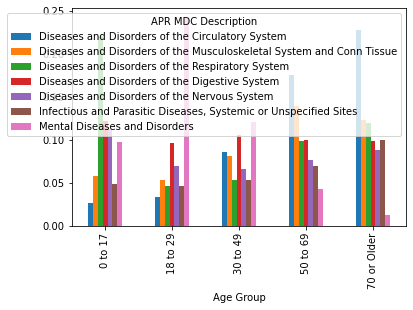

In [0]:
# Basic exploratory graph

MDC_age_processed.plot.bar()
plt.show()

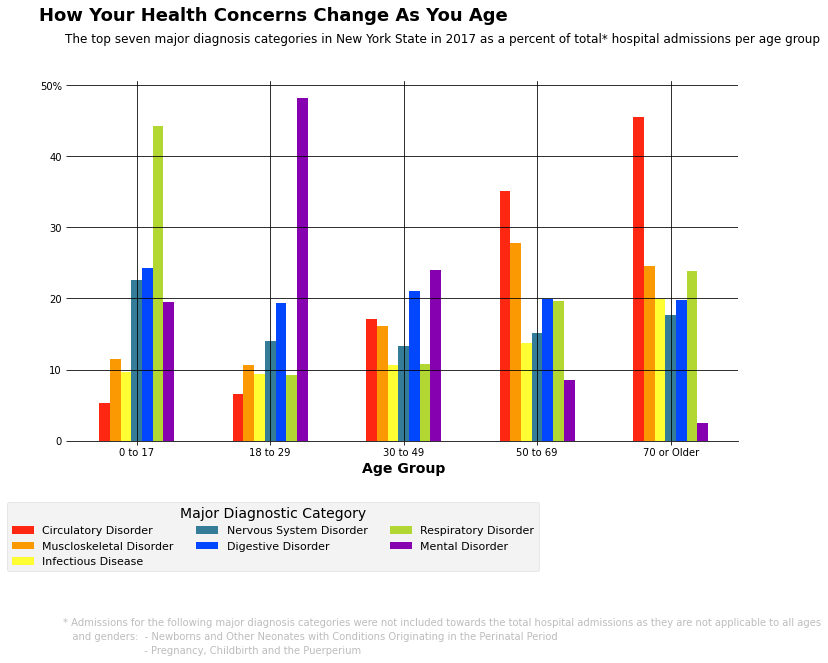

In [0]:
# Graph

# Define some plotting variables
x_values = np.array([10,20,30,40,50])
width = np.array(0.8)

# Create seperate figure and axes variables 
fig, ax = plt.subplots(figsize = (12,10))

# Style
plt.style.use('fivethirtyeight')

# Add bars
# Add descriptive labels and different colors for each APR MDC Description

ax.bar(x_values- (3*width), circulatory, width, label= 'Circulatory Disorder',
       color= '#FE2712')
ax.bar(x_values- (2*width), musculoskeletal, width, label= 'Muscloskeletal Disorder',
       color= '#FB9902')
ax.bar(x_values- width, infection, width, label= 'Infectious Disease', 
       color= '#FEFE33')
ax.bar(x_values, nervous, width, label= 'Nervous System Disorder', 
       color= '#347C98')
ax.bar(x_values+ width, digestive, width, label= 'Digestive Disorder', 
       color= '#0247FE')
ax.bar(x_values+ (2*width), respiratory, width, label= 'Respiratory Disorder', 
       color= '#B2D732')
ax.bar(x_values+ (3*width), mental, width, label= 'Mental Disorder', 
       color= '#8601AF')

# Set Title
ax.set_title("How Your Health Concerns Change As You Age", x=.305, y=1.15, fontsize= 18,
             fontweight= 'bold')

# Set Subtitle
ax.text(s= "The top seven major diagnosis categories in New York State in 2017 as a percent of total* hospital admissions per age group",
        x= 4.6, y=0.28, fontsize= 12)

# Set X-tick and X-tick labels
ax.set_xticks(x_values)
ax.set_xticklabels(('0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'))

# Set Y-tick labels
ax.set_yticklabels(['0','10','20','30','40', '50%'])

# Set X label
ax.set_xlabel('Age Group', color= 'black', fontsize= 14, fontweight= 'bold')

# Set figure background color
fig.set_facecolor(color='None')

# Set the Axes background color
ax.set_facecolor(color='None')

# Turn off the spine
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Color of grid
ax.grid(color= '#000000', b= True)

# Asterisk text underneath graph
ax.text(s= "* Admissions for the following major diagnosis categories were not included towards the total hospital admissions as they are not applicable to all ages",
        x= 4.5, y= -.13, fontsize= 10, color= '#BDBDBD')
ax.text(s= "   and genders:  - Newborns and Other Neonates with Conditions Originating in the Perinatal Period",
        x= 4.5, y= -.14, fontsize= 10, color= '#BDBDBD')
ax.text(s= "                          - Pregnancy, Childbirth and the Puerperium",
        x= 4.5, y= -.15, fontsize= 10, color= '#BDBDBD')

# Show legend, set location, add title
ax.legend(bbox_to_anchor=(0.71, -0.155), ncol = 3, title= 'Major Diagnostic Category',
          fontsize= 11)

fig.subplots_adjust(bottom=0.38)

plt.show()


In [0]:
# Save figure
# Download figure to local computer

fig.savefig('Health_Age_Final.png')
files.download('Health_Age_Final.png')

## Second Visual

In [0]:
# Starting Data

age_gender_race_DRG_MDC

,Unnamed: 0,Age Group,Gender,Race,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description
0,0,30 to 49,M,White,750,Schizophrenia,19,Mental Diseases and Disorders
1,1,50 to 69,M,White,194,Heart failure,5,Diseases and Disorders of the Circulatory System
2,2,30 to 49,F,White,465,Urinary stones & acquired upper urinary tract ...,11,Diseases and Disorders of the Kidney and Urina...
3,3,50 to 69,F,White,721,"Post-operative, post-traumatic, other device i...",18,"Infectious and Parasitic Diseases, Systemic or..."
4,4,18 to 29,F,White,720,Septicemia & disseminated infections,18,"Infectious and Parasitic Diseases, Systemic or..."
...,...,...,...,...,...,...,...,...
2343564,2343564,50 to 69,F,White,120,Major respiratory & chest procedures,4,Diseases and Disorders of the Respiratory System
2343565,2343565,50 to 69,F,Other Race,198,Angina pectoris & coronary atherosclerosis,5,Diseases and Disorders of the Circulatory System
2343566,2343566,30 to 49,M,Other Race,347,"Other back & neck disorders, fractures & injuries",8,Diseases and Disorders of the Musculoskeletal ...
2343567,2343567,70 or Older,F,Black/African American,512,Uterine & adnexa procedures for non-ovarian & ...,13,Diseases and Disorders of the Female Reproduct...


In [0]:
# Create mental health subset

mental = age_gender_race_DRG_MDC[age_gender_race_DRG_MDC['APR MDC Description'] == 'Mental Diseases and Disorders']
mental

,Unnamed: 0,Age Group,Gender,Race,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description
0,0,30 to 49,M,White,750,Schizophrenia,19,Mental Diseases and Disorders
32,32,50 to 69,M,White,751,Major depressive disorders & other/unspecified...,19,Mental Diseases and Disorders
34,34,30 to 49,F,White,750,Schizophrenia,19,Mental Diseases and Disorders
37,37,30 to 49,F,Black/African American,751,Major depressive disorders & other/unspecified...,19,Mental Diseases and Disorders
40,40,18 to 29,M,Black/African American,750,Schizophrenia,19,Mental Diseases and Disorders
...,...,...,...,...,...,...,...,...
2343468,2343468,50 to 69,M,White,750,Schizophrenia,19,Mental Diseases and Disorders
2343470,2343470,18 to 29,F,White,759,Eating disorders,19,Mental Diseases and Disorders
2343473,2343473,50 to 69,M,White,750,Schizophrenia,19,Mental Diseases and Disorders
2343476,2343476,18 to 29,M,Black/African American,753,Bipolar disorders,19,Mental Diseases and Disorders


In [0]:
# Drop unnecessary columns

mental = mental[['Age Group', 'Gender', 'Race', 'APR DRG Description']]
mental

,Age Group,Gender,Race,APR DRG Description
0,30 to 49,M,White,Schizophrenia
32,50 to 69,M,White,Major depressive disorders & other/unspecified...
34,30 to 49,F,White,Schizophrenia
37,30 to 49,F,Black/African American,Major depressive disorders & other/unspecified...
40,18 to 29,M,Black/African American,Schizophrenia
...,...,...,...,...
2343468,50 to 69,M,White,Schizophrenia
2343470,18 to 29,F,White,Eating disorders
2343473,50 to 69,M,White,Schizophrenia
2343476,18 to 29,M,Black/African American,Bipolar disorders


In [0]:
# Value counts of APR DRG Descriptions

mental['APR DRG Description'].value_counts()

Schizophrenia                                                  35607
Bipolar disorders                                              25430
Major depressive disorders & other/unspecified psychoses       23944
Depression except major depressive disorder                    11713
Organic mental health disturbances                              4991
Adjustment disorders & neuroses except depressive diagnoses     4002
Acute anxiety & delirium states                                 3376
Behavioral disorders                                            2390
Disorders of personality & impulse control                      1584
Other mental health disorders                                   1002
Mental illness diagnosis w O.R. procedure                        463
Eating disorders                                                 419
Tracheostomy w MV 96+ hours w extensive procedure or ECMO          2
Tracheostomy w MV 96+ hours w/o extensive procedure                1
Name: APR DRG Description, dtype: 

In [0]:
# Drop both Tracheostomy categories as they are statistically insignificant

mental = mental[mental['APR DRG Description'] != 'Tracheostomy w MV 96+ hours w extensive procedure or ECMO']
mental =  mental[mental['APR DRG Description'] != 'Tracheostomy w MV 96+ hours w/o extensive procedure']

In [0]:
# Create crosstab to get counts for APR DRG Description per Age Group
# Normalize across age group (across row)

mental_age = pd.crosstab(mental['Age Group'], mental['APR DRG Description'], normalize= 'index')
mental_age

APR DRG Description,Acute anxiety & delirium states,Adjustment disorders & neuroses except depressive diagnoses,Behavioral disorders,Bipolar disorders,Depression except major depressive disorder,Disorders of personality & impulse control,Eating disorders,Major depressive disorders & other/unspecified psychoses,Mental illness diagnosis w O.R. procedure,Organic mental health disturbances,Other mental health disorders,Schizophrenia
Age Group,,,,,,,,,,,,
0 to 17,0.037633,0.058520,0.160011,0.216875,0.161391,0.002852,0.017759,0.280732,0.002760,0.023923,0.014814,0.022727
18 to 29,0.024870,0.046615,0.012901,0.246043,0.120528,0.025569,0.004322,0.213858,0.004389,0.008246,0.003957,0.288702
30 to 49,0.024899,0.032926,0.005001,0.245960,0.092699,0.015029,0.001737,0.185845,0.004290,0.004580,0.006817,0.380218
50 to 69,0.029341,0.021970,0.002337,0.202114,0.085074,0.007155,0.000791,0.213549,0.003308,0.024055,0.010248,0.400058
70 or Older,0.055923,0.012482,0.000979,0.086515,0.054577,0.001713,0.000979,0.178781,0.005629,0.445423,0.021782,0.135218


In [0]:
# Create Y-Values

anxiety = mental_age.loc[:, 'Acute anxiety & delirium states'].values.tolist()
adjustment = mental_age.loc[:, 'Adjustment disorders & neuroses except depressive diagnoses'].values.tolist()
behavioral = mental_age.loc[:, 'Behavioral disorders'].values.tolist()
bipolar = mental_age.loc[:, 'Bipolar disorders'].values.tolist()
minor_depressive = mental_age.loc[:, 'Depression except major depressive disorder'].values.tolist()
personality = mental_age.loc[:, 'Disorders of personality & impulse control'].values.tolist()
eating = mental_age.loc[:, 'Eating disorders'].values.tolist()
major_depressive = mental_age.loc[:, 'Major depressive disorders & other/unspecified psychoses'].values.tolist()
operation = mental_age.loc[:, 'Mental illness diagnosis w O.R. procedure'].values.tolist()
organic = mental_age.loc[:, 'Organic mental health disturbances'].values.tolist()
other = mental_age.loc[:, 'Other mental health disorders'].values.tolist()
schizophrenia = mental_age.loc[:, 'Schizophrenia'].values.tolist()


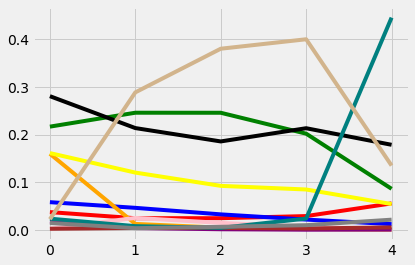

In [0]:
# Basic exploratory graph

plt.plot(anxiety, color= 'red')
plt.plot(adjustment, color= 'blue')
plt.plot(behavioral, color= 'orange')
plt.plot(bipolar, color= 'green')
plt.plot(minor_depressive, color= 'yellow')
plt.plot(personality, color= 'pink')
plt.plot(eating, color= 'purple')
plt.plot(major_depressive, color= 'black')
plt.plot(operation, color= 'brown')
plt.plot(organic, color= 'teal')
plt.plot(other, color= 'gray')
plt.plot(schizophrenia, color= 'tan')

plt.show()

In [0]:
# Want to Graph with Plotly, need to convert data in Tidy format

# Reset index
mental_age_tidy = mental_age.reset_index()
mental_age_tidy

APR DRG Description,Age Group,Acute anxiety & delirium states,Adjustment disorders & neuroses except depressive diagnoses,Behavioral disorders,Bipolar disorders,Depression except major depressive disorder,Disorders of personality & impulse control,Eating disorders,Major depressive disorders & other/unspecified psychoses,Mental illness diagnosis w O.R. procedure,Organic mental health disturbances,Other mental health disorders,Schizophrenia
0,0 to 17,0.037633,0.058520,0.160011,0.216875,0.161391,0.002852,0.017759,0.280732,0.002760,0.023923,0.014814,0.022727
1,18 to 29,0.024870,0.046615,0.012901,0.246043,0.120528,0.025569,0.004322,0.213858,0.004389,0.008246,0.003957,0.288702
2,30 to 49,0.024899,0.032926,0.005001,0.245960,0.092699,0.015029,0.001737,0.185845,0.004290,0.004580,0.006817,0.380218
3,50 to 69,0.029341,0.021970,0.002337,0.202114,0.085074,0.007155,0.000791,0.213549,0.003308,0.024055,0.010248,0.400058
4,70 or Older,0.055923,0.012482,0.000979,0.086515,0.054577,0.001713,0.000979,0.178781,0.005629,0.445423,0.021782,0.135218


In [0]:
# Column headers to list
headers = list(mental_age)
headers

['Acute anxiety & delirium states',
 'Adjustment disorders & neuroses except depressive diagnoses',
 'Behavioral disorders',
 'Bipolar disorders',
 'Depression except major depressive disorder',
 'Disorders of personality & impulse control',
 'Eating disorders',
 'Major depressive disorders & other/unspecified psychoses',
 'Mental illness diagnosis w O.R. procedure',
 'Organic mental health disturbances',
 'Other mental health disorders',
 'Schizophrenia']

In [0]:
# Convert to Tidy data format

mental_age_tidy = mental_age_tidy.melt(id_vars= 'Age Group', value_vars= headers)
mental_age_tidy

,Age Group,APR DRG Description,value
0,0 to 17,Acute anxiety & delirium states,0.037633
1,18 to 29,Acute anxiety & delirium states,0.024870
2,30 to 49,Acute anxiety & delirium states,0.024899
3,50 to 69,Acute anxiety & delirium states,0.029341
4,70 or Older,Acute anxiety & delirium states,0.055923
5,0 to 17,Adjustment disorders & neuroses except depress...,0.058520
6,18 to 29,Adjustment disorders & neuroses except depress...,0.046615
7,30 to 49,Adjustment disorders & neuroses except depress...,0.032926
8,50 to 69,Adjustment disorders & neuroses except depress...,0.021970
9,70 or Older,Adjustment disorders & neuroses except depress...,0.012482


In [0]:
# Graph using Plotly

import plotly.express as px

# Set x and y values, grouped by color
# Set title
# Set figure size
# Set y-axis label
# Set template style

fig2 = px.line(mental_age_tidy, x= 'Age Group', y= 'value', color= 'APR DRG Description',
              title= '<b>How Mental Health Admissions Vary With Age<b>',
              width= 830, height= 800,
              labels= {'value': 'Percent of Mental Health Admissions By Age Group'},
              template= 'plotly_white'
              )


# Update layout
# Update title location
# Update font size
# Update legend location
# Update axis ticks and labels
# Update subtitle
# Update legend title 

fig2.update_layout(
    title= {'y': .93, 'x': 0.5},
    title_font_size= 20,
    font= dict(size= 12),
    legend= dict(x=0, y= -0.8),
    yaxis= dict(
        tickvals= [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45],
        ticktext= ['0','5', '10', '15', '20', '25', '30', '35', '40', '45%']),
    annotations= [dict(x= -0.08, y= 1.07, showarrow= False, xref= 'paper', yref= 'paper', 
                       text= '<i>Mental health disorders as a percent of total mental health hospital admissions by age group in the state of New York in 2017<i>'), 
                  dict(x= 0.045, y= -.18, showarrow= False, xref= 'paper', yref= 'paper', 
                       text= '<b>Mental Health Disorders<b>: <i>Click to filter<i>')]
)

# Change Color
# Two of the colors are repeated
fig2['data'][11]['line']['color']="black"
fig2['data'][10]['line']['color']="purple"

#Change legend names
fig2.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))

fig2.show()

In [0]:
# Save interactive Plotly graph as html

import plotly.io as pio
pio.write_html(fig2, file= 'index.html', auto_open= True)

In [0]:
# Download graph to local computer 

files.download('index.html')